# Oblig 7: Statistiske beregninger

## Teori
### Statistikk
Gjennomsnittet $\bar{x}$ til $N$ verdier $x_i$ er gitt ved:

$$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$

Et mål på avvik fra gjennomsnittet er _standardavviket_. Dette er gitt som rota av variansen:

$$\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N}(x_i - \bar{x})^2}$$

Her benytter vi frihetsgrad 1 (deler på $N-1$) for å kompensere for få målinger.

### Regresjon
Regresjon er en måte å tilpasse en funksjon til diskrete data på. Vi bruker en regresjonsmodul i Python (*polyfit*) som er basert på *minste kvadraters metode*. Dette er en metode som tilpasser en kurve til datapunktene slik at variansen (avviket fra gjennomsnittet) blir så liten som mulig.


### Standardkurver og spektrofotometri
En standardkurve i spektrofotometri er en lineær funksjon som er tilpasset absorpsjonsdataene til et sett med løsninger med kjent konsentrasjon. Kurven bør følge Beers lov, altså at konsentrasjonen skal være proporsjonal med absorbansen ($c \propto A$). Funksjonen bør altså være lineær og gå igjennom origo. Det er ikke alltid vi får en kurve gjennom origo, og da kan vi eventuelt sløyfe konstantleddet. Merk derimot at du da endrer på modellen, og variansen er ikke lenger så liten som mulig.

### Numerisk derivasjon
Definisjonen av den deriverte sier at den deriverte representerer endringen mellom to tilstander (funksjonsverdier) over en svært liten endring i en annen tilstand, _dx_: 

$$f'(x) = \frac{df}{dt} = \lim_{\Delta x \rightarrow 0} \frac{f(x+dx) - f(x)}{dx}$$

Vi kan tilnærme grenseverdien numerisk med en liten _dx_:

$$f'(x) = \frac{df}{dx} \approx \frac{f(x+dx) - f(x)}{dx}$$

Dette kan vi bruke til å finne den momentane endringen til både funksjoner og diskrete data. Her skal vi bruke den numerisk deriverte til å finne endringen i pH som funksjon av volum base tilsatt i en titrering. Der endringen er størst, vil vi ha ekvivalenspunktet.

## Oppgaver
### 7.1
a)

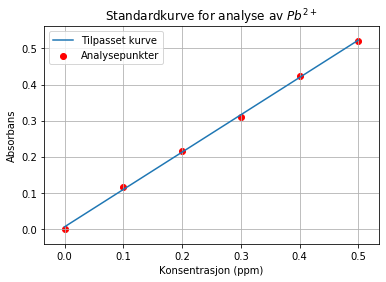

In [1]:
import numpy as np
import matplotlib.pyplot as plt

bly = [0,0.1,0.2,0.3,0.4,0.5]
absorbans = [0,0.116,0.216,0.310,0.425,0.520]
ukjent = 0.340

a,b = np.polyfit(bly, absorbans, 1)
x = np.linspace(0,0.5,1000)
y1 = a*x + b

plt.scatter(bly,absorbans,color='red',label='Analysepunkter')
plt.plot(x,y1,label='Tilpasset kurve')
plt.title('Standardkurve for analyse av $Pb^{2+}$')
plt.xlabel('Konsentrasjon (ppm)')
plt.ylabel('Absorbans')
plt.legend()
plt.grid()
plt.show()

b)

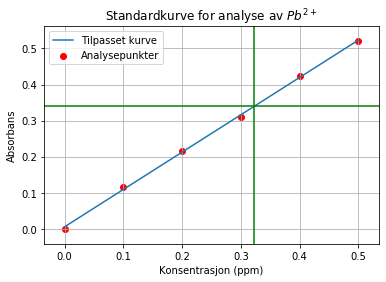

Konsentrasjonen av bly i bekkevannet var 0.323 ppm


In [2]:
kons=(ukjent-b)/a

plt.scatter(bly,absorbans,color='red',label='Analysepunkter')
plt.plot(x,y1,label='Tilpasset kurve')
plt.title('Standardkurve for analyse av $Pb^{2+}$')
plt.xlabel('Konsentrasjon (ppm)')
plt.ylabel('Absorbans')
plt.legend()
plt.grid()
plt.axhline(y=ukjent,color='green')
plt.axvline(x=kons, color = 'green')
plt.show()

print(f'Konsentrasjonen av bly i bekkevannet var {kons:.3f} ppm')

### 7.2
a)

In [3]:
import numpy as np

def gjennomsnitt(x):

    snitt = 0
    for i in range(len(x)):
        snitt += x[i]
    snitt = snitt/(len(x))
    return snitt

def standardavvik(x,snitt):
    ddof = 1
    avvik = 0
    for i in range(len(x)):
        avvik += (x[i] - snitt)**2
    avvik = (avvik/(len(x)-ddof))**(1/2)
    return avvik

liste = [1,2,2,1,3,3]
snitt = gjennomsnitt(liste)
snitt_numpy = np.mean(liste)
avvik = standardavvik(liste,snitt)
avvik_numpy = np.std(liste, ddof = 1)

print(f'Snitt egen funksjon: {snitt}, snitt numpy-funksjon: {snitt_numpy}')
print(f'Standardavvik egen funksjon: {avvik:.1f}, standardavvik numpy-funksjon: {avvik_numpy:.1f}')

Snitt egen funksjon: 2.0, snitt numpy-funksjon: 2.0
Standardavvik egen funksjon: 0.9, standardavvik numpy-funksjon: 0.9


b)

In [4]:
konsentrasjon = [245, 272, 252, 264, 261, 272, 255, 260, 268, 259] # mg/mL
snitt_kromatografi = gjennomsnitt(konsentrasjon)
avvik_kromatografi = standardavvik(konsentrasjon,snitt_kromatografi)
print(f'Snittet er {snitt_kromatografi:3.0f} mg/mL og standardavviket er {avvik_kromatografi:.0f} mg/mL')

Snittet er 261 mg/mL og standardavviket er 8 mg/mL


### 7.3

a)

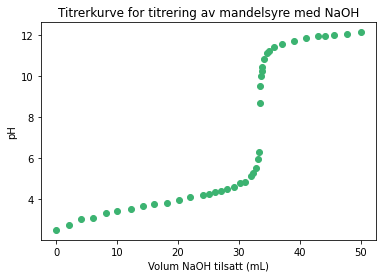

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Datafiler/titreringsdata.txt')
x = data["volum"]
y = data["pH"]

plt.scatter(x, y, color = 'mediumseagreen')
plt.title('Titrerkurve for titrering av mandelsyre med NaOH')
plt.ylabel('pH')
plt.xlabel('Volum NaOH tilsatt (mL)')
plt.show()

b) og c)

In [20]:
# Løsning med funksjon
def numder(x,y):
    derivert = []
    for i in range(len(y)-1):
        der = (y[i+1]-y[i])/(x[i+1]-x[i])
        derivert.append(der)
    return derivert

def finnmaks(liste):
    maks = liste[0]
    for i in range(len(liste)):
        if liste[i] > maks:
            maks = liste[i]
            indeks = i
    return maks, indeks

derivert = numder(x,y)
maksimum, indeks = finnmaks(derivert) # Finner indeksen til maksderivert i lista
ekv_volum = (x[indeks] + x[indeks+1])/2
pH_ekvivalens = (y[indeks] + y[indeks+1])/2

print(f"Ekvivalenspunktet ble nådd ved tilsats av {ekv_volum:.2f} mL 0.10 M NaOH. Da var pH-en {pH_ekvivalens:.2f}")

Ekvivalenspunktet ble nådd ved tilsats av 33.54 mL 0.10 M NaOH. Da var pH-en 9.09


Her har vi brukt midtpunktet mellom de to punktene som det er mest endring mellom. Vi kan visualisere endringen slik:

In [23]:
derivert.append(None) # Legger til en nullverdi slik at x og derivert er like lange.

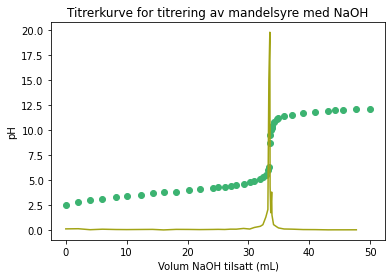

In [22]:
plt.scatter(x, y, color = 'mediumseagreen', label = "Datapunkter")
plt.plot(x, derivert, color = 'xkcd:vomit', label = "Deriverte data")
plt.title('Titrerkurve for titrering av mandelsyre med NaOH')
plt.ylabel('pH')
plt.xlabel('Volum NaOH tilsatt (mL)')
plt.show()